In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
import phate

import proxUtil

In [2]:
bigdf = pd.read_csv("S&P500_2024-10.csv",header=None)
bigdf.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,9,0.228929,-0.072014,-0.614781,0.680127,0.306763,0.048850,-0.373398,0.348953,0.332056,...,0.181761,0.035563,-0.262267,-0.753464,-0.502314,-0.028895,0.271207,-0.342332,0.106688,-0.862377
1,9,-0.398001,0.050900,-1.259658,1.539661,-0.284248,-0.445419,1.102817,0.528295,0.095172,...,0.118846,-0.466542,-0.203586,-4.555121,0.017396,-0.208245,-0.220554,-0.576561,0.833499,-0.791329
2,9,-0.253910,0.424891,-0.420332,0.833389,-0.208833,-0.463069,-0.391837,-0.035620,0.059368,...,-0.687483,0.092618,-0.306343,-6.148187,0.045121,0.230349,-0.007269,-0.077030,0.326526,-0.852535
3,0,0.123831,0.814852,-0.300860,1.089113,-0.114264,-0.276851,-0.855645,-0.028885,-0.060176,...,0.150430,-0.264759,-1.071062,-0.186532,-0.078227,-0.661897,-0.691975,-0.216620,0.312897,-0.679948
4,0,0.115212,0.785252,-0.345628,1.145980,-0.112113,-0.300161,-0.930776,-0.051546,-0.030321,...,0.230425,-0.306221,-1.027797,-0.103082,-0.099511,-0.646335,-0.695632,-0.262438,0.328659,-0.628810


In [3]:
bigdf2 = bigdf[bigdf.columns[1:]].interpolate(inplace=False,axis=1)
bigdf2.head()

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
0,0.228929,-0.072014,-0.614781,0.680127,0.306763,0.048850,-0.373398,0.348953,0.332056,0.003514,...,0.181761,0.035563,-0.262267,-0.753464,-0.502314,-0.028895,0.271207,-0.342332,0.106688,-0.862377
1,-0.398001,0.050900,-1.259658,1.539661,-0.284248,-0.445419,1.102817,0.528295,0.095172,-0.513870,...,0.118846,-0.466542,-0.203586,-4.555121,0.017396,-0.208245,-0.220554,-0.576561,0.833499,-0.791329
2,-0.253910,0.424891,-0.420332,0.833389,-0.208833,-0.463069,-0.391837,-0.035620,0.059368,-0.232719,...,-0.687483,0.092618,-0.306343,-6.148187,0.045121,0.230349,-0.007269,-0.077030,0.326526,-0.852535
3,0.123831,0.814852,-0.300860,1.089113,-0.114264,-0.276851,-0.855645,-0.028885,-0.060176,0.081238,...,0.150430,-0.264759,-1.071062,-0.186532,-0.078227,-0.661897,-0.691975,-0.216620,0.312897,-0.679948
4,0.115212,0.785252,-0.345628,1.145980,-0.112113,-0.300161,-0.930776,-0.051546,-0.030321,0.145533,...,0.230425,-0.306221,-1.027797,-0.103082,-0.099511,-0.646335,-0.695632,-0.262438,0.328659,-0.628810


In [4]:
bigdf3 = pd.DataFrame(data=bigdf[bigdf.columns[0]]).join(bigdf2)
bigdf3.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,9,0.228929,-0.072014,-0.614781,0.680127,0.306763,0.048850,-0.373398,0.348953,0.332056,...,0.181761,0.035563,-0.262267,-0.753464,-0.502314,-0.028895,0.271207,-0.342332,0.106688,-0.862377
1,9,-0.398001,0.050900,-1.259658,1.539661,-0.284248,-0.445419,1.102817,0.528295,0.095172,...,0.118846,-0.466542,-0.203586,-4.555121,0.017396,-0.208245,-0.220554,-0.576561,0.833499,-0.791329
2,9,-0.253910,0.424891,-0.420332,0.833389,-0.208833,-0.463069,-0.391837,-0.035620,0.059368,...,-0.687483,0.092618,-0.306343,-6.148187,0.045121,0.230349,-0.007269,-0.077030,0.326526,-0.852535
3,0,0.123831,0.814852,-0.300860,1.089113,-0.114264,-0.276851,-0.855645,-0.028885,-0.060176,...,0.150430,-0.264759,-1.071062,-0.186532,-0.078227,-0.661897,-0.691975,-0.216620,0.312897,-0.679948
4,0,0.115212,0.785252,-0.345628,1.145980,-0.112113,-0.300161,-0.930776,-0.051546,-0.030321,...,0.230425,-0.306221,-1.027797,-0.103082,-0.099511,-0.646335,-0.695632,-0.262438,0.328659,-0.628810


In [5]:
comps = [9,10] #[5,9]
filename = "TechUtil_S&P.csv" #"TechHeal_S&P.tsv"

In [6]:
bigdf3[bigdf3[0].isin(comps)]

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,9,0.228929,-0.072014,-0.614781,0.680127,0.306763,0.048850,-0.373398,0.348953,0.332056,...,0.181761,0.035563,-0.262267,-0.753464,-0.502314,-0.028895,0.271207,-0.342332,0.106688,-0.862377
1,9,-0.398001,0.050900,-1.259658,1.539661,-0.284248,-0.445419,1.102817,0.528295,0.095172,...,0.118846,-0.466542,-0.203586,-4.555121,0.017396,-0.208245,-0.220554,-0.576561,0.833499,-0.791329
2,9,-0.253910,0.424891,-0.420332,0.833389,-0.208833,-0.463069,-0.391837,-0.035620,0.059368,...,-0.687483,0.092618,-0.306343,-6.148187,0.045121,0.230349,-0.007269,-0.077030,0.326526,-0.852535
9,9,-0.059814,-0.110673,-0.119637,1.345935,-0.194411,-0.687919,3.074714,-0.167493,0.183339,...,-0.681940,-0.260222,0.284146,-4.417655,0.027876,-0.506433,0.143570,-0.293118,0.696891,0.251240
16,9,-0.054000,0.600024,-0.546024,0.954036,-0.132006,-0.534021,0.864036,0.282012,-0.264012,...,-0.035762,-0.339253,-0.297009,-3.420135,-0.313517,0.091501,-0.009000,-0.393015,0.312015,-0.318012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,9,0.035768,-0.254843,-1.421734,2.280148,-0.482855,-0.742166,-3.375510,1.256314,-0.286136,...,0.867343,-0.920999,-0.464968,-0.214600,-0.054099,0.975097,0.438144,-0.670631,-0.022356,0.049180
476,9,-0.132475,0.815248,-0.922253,0.629268,-0.588504,0.295527,-0.219093,0.114639,-0.221644,...,-0.380265,-0.598029,-0.117189,1.092932,-0.004331,-0.823653,0.173245,0.247121,-0.430552,-0.463673
478,10,0.475482,0.000000,-0.100102,0.800800,0.300298,-0.125123,-0.675677,-0.375370,0.125123,...,0.225226,-0.750749,-0.075072,0.375370,-0.225226,-0.125123,0.350349,-0.375370,0.375370,-0.050042
483,10,0.647830,-0.111693,0.189878,0.011172,0.424436,-0.067014,-0.100529,-0.072596,-0.262483,...,-0.044679,0.268064,0.033507,0.865633,-0.295989,0.189878,-0.111693,0.318333,-0.228976,-0.446779


In [7]:
bigdf3[bigdf3[0].isin(comps)].to_csv(filename,header=False,index=False, sep="\t")

In [8]:
proxUtil.getProx(filename,filename,num_trees=14, modelname="PFtechutil")

reading file [TechUtil_S&P.csv]:finished in 0:0:0.059
reading file [TechUtil_S&P.csv]:finished in 0:0:0.016
Running on configurations...
Dataset: TechUtil_S&P.csv, Training Data : 114x160 , Testing Data: 114x160, Train #Classes: 2, Test #Classes: 2
Repeats: 1 , Trees: 14 , Candidates per Split(r): 5
Output Dir: output, Export: 1, Verbosity: 1
Select DM per node: true , Shuffle Data: false, JVM WarmUp: false
----------------------------------------------------------------------------------------------------

-----------------Repetition No: 1 (TechUtil_S&P.csv)   -----------------
Using: 3 MB, Free: 11 MB, Allocated Pool: 14 MB, Max Available: 1024 MB
core.ProximityForestResult@e9e54c2
0.1.2.3.4.5.6.7.8.9.10.11.12.13.
Using: 58 MB, Free: 75 MB, Allocated Pool: 133 MB, Max Available: 1024 MB
**
Computing Forest Proximities...
Done Computing Forest Proximities. Computation time: 38.0ms
Training Time: 4340.372048ms (0:0:4.340)
Prediction Time: 811.137886ms (0:0:0.811)
Correct(TP+TN): 114 vs

In [9]:
P,y = proxUtil.getProxArrays()

In [10]:
P = proxUtil.SymmetrizeProx(P)

In [11]:
mds = MDS(n_components=2, random_state=0, dissimilarity='precomputed')

In [16]:
dis = (np.ones(P.shape) - P)**4

In [17]:
emb = mds.fit_transform(dis)

/home/ben/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [18]:
Xt = emb.transpose()

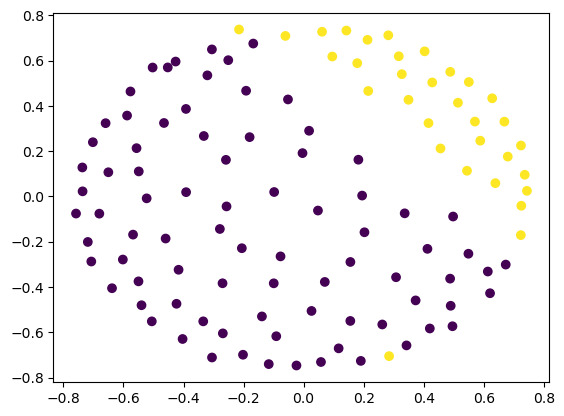

In [19]:
plt.scatter(Xt[0],Xt[1],c=y)

In [20]:
#ph = phate.PHATE(n_components=2, knn_dist='precomputed', random_state=0)
ph = phate.PHATE(n_components=2, knn_dist='precomputed', random_state=0)

In [21]:
emb2 = ph.fit_transform(dis)

Calculating PHATE...
  Running PHATE on precomputed affinity matrix with 114 observations.
  Calculating graph and diffusion operator...
  Calculating optimal t...
    Automatically selected t = 2
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 0.11 seconds.


In [22]:
X2t = emb2.transpose()

In [36]:
y2 = [x for x in y]

In [43]:
y2[31]=4
y2[51]=3

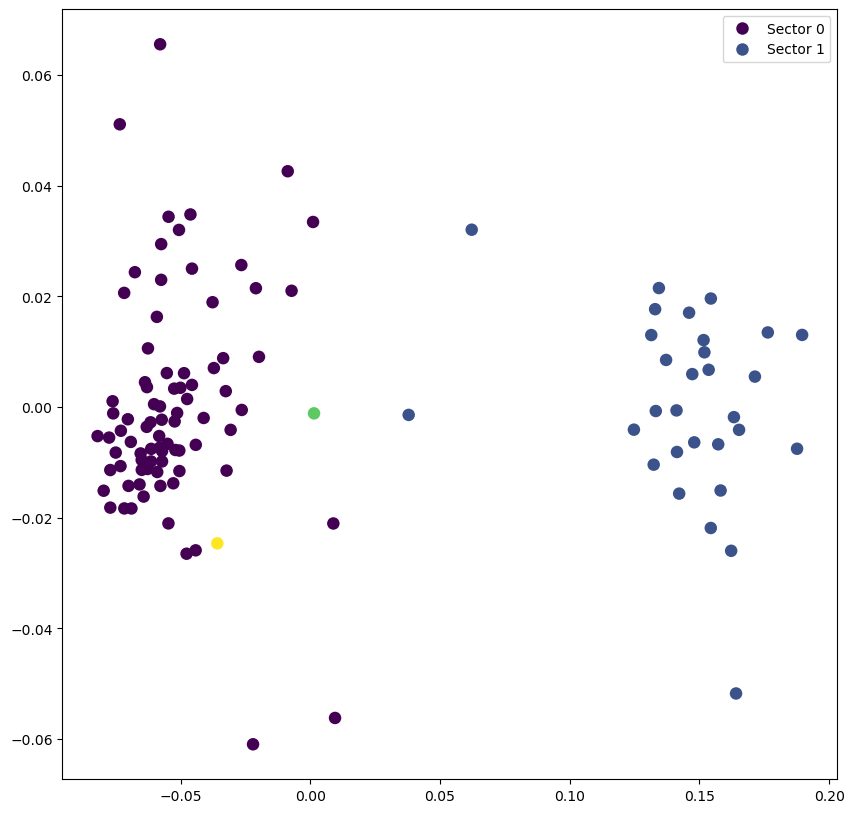

In [44]:
plt.figure(figsize=(10,10))
#plt.scatter(X2t[0],X2t[1],c=y)

size=81
sc = plt.scatter(X2t[0], X2t[1], s=size, c=y2, edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Sector {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(y)]
plt.legend(handles=handles)
plt.show()

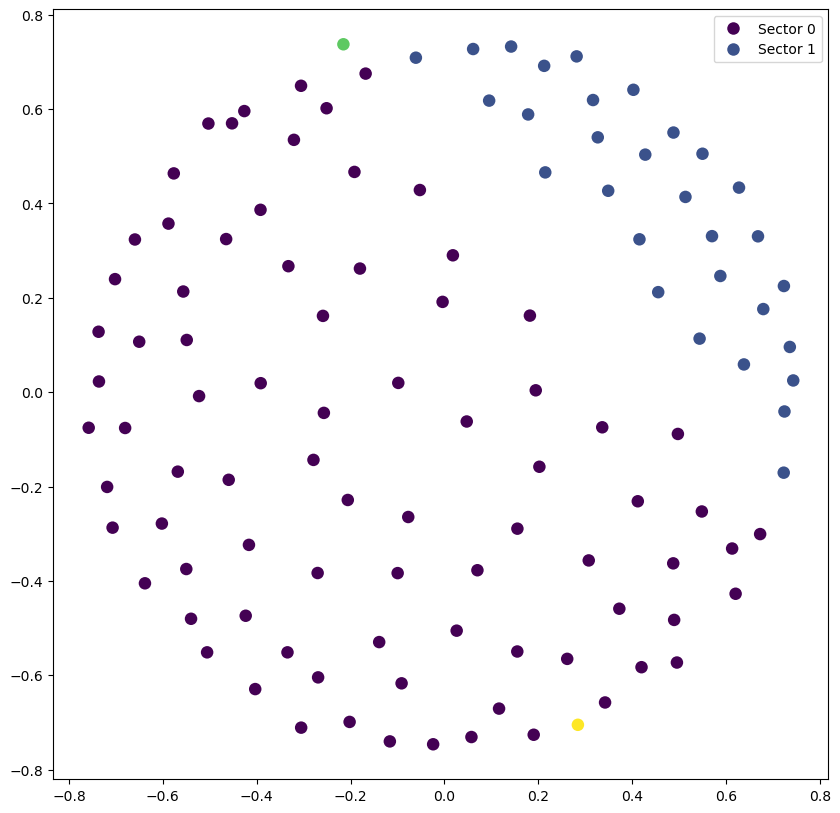

In [45]:
plt.figure(figsize=(10,10))
#plt.scatter(X2t[0],X2t[1],c=y)

size=81
sc = plt.scatter(Xt[0], Xt[1], s=size, c=y2, edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Sector {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(y)]
plt.legend(handles=handles)
plt.show()

In [24]:
labelDF = pd.read_csv("Labeled_11-01-2024_GICS.csv")
labelDF.head()

,No.,Symbol,Company Name,Market Cap,Revenue,Sector,Labels
0,1,AAPL,Apple Inc.,"3,381.32B",391.04B,Technology,9
1,2,NVDA,NVIDIA Corporation,"3,328.48B",96.31B,Technology,9
2,3,MSFT,Microsoft Corporation,"3,060.49B",254.19B,Technology,9
3,4,GOOG,Alphabet Inc.,"2,103.30B",339.86B,Communication Services,0
4,5,GOOGL,Alphabet Inc.,"2,093.09B",339.86B,Communication Services,0


In [25]:
syms = list(labelDF["Symbol "])
labels = list(labelDF["Labels"])
SymLabDic = {syms[i]:labels[i] for i in range(labelDF.shape[0])}

secs = list(labelDF["Sector "])
SecLabDic = {secs[i]:labels[i] for i in range(labelDF.shape[0])}

In [26]:
SecLabDic2 = {labels[i]:secs[i] for i in range(labelDF.shape[0])}

In [27]:
SecLabDic

{'Technology': 9,
 'Communication Services': 0,
 'Consumer Discretionary': 1,
 'Financials': 4,
 'Healthcare': 5,
 'Consumer Staples': 2,
 'Energy': 3,
 'Materials': 7,
 'Industrials': 6,
 'Utilities': 10,
 'Real Estate': 8}

In [28]:
SecLabDic2

{9: 'Technology',
 0: 'Communication Services',
 1: 'Consumer Discretionary',
 4: 'Financials',
 5: 'Healthcare',
 2: 'Consumer Staples',
 3: 'Energy',
 7: 'Materials',
 6: 'Industrials',
 10: 'Utilities',
 8: 'Real Estate'}

In [29]:
outlierScores = proxUtil.getOutlierScores(P,y)

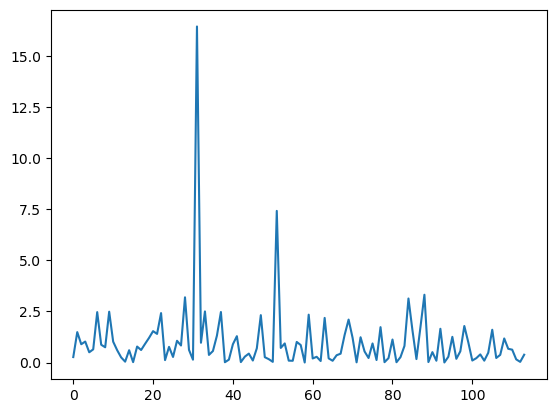

In [30]:
plt.plot(outlierScores)

In [31]:
labelDF.iloc[bigdf3[bigdf3[0].isin(comps)].iloc[np.argmax(outlierScores)].name]

No.                          119
Symbol                       GEV
Company Name     GE Vernova Inc.
Market Cap                83.47B
Revenue                   34.42B
Sector                 Utilities
Labels                        10
Name: 118, dtype: object

In [32]:
SortedScores = np.argsort(outlierScores)

In [33]:
SortedScores[-7:]

array([ 9, 33, 84, 28, 88, 51, 31])

In [34]:
labelDF.iloc[bigdf3[bigdf3[0].isin(comps)].iloc[SortedScores[-2]].name]

No.                       226
Symbol                    VST
Company Name     Vistra Corp.
Market Cap             41.19B
Revenue                14.06B
Sector              Utilities
Labels                     10
Name: 225, dtype: object

In [47]:
labelDF.iloc[bigdf3[bigdf3[0].isin(comps)].iloc[131].name]

No.                                 450
Symbol                             JNPR
Company Name     Juniper Networks, Inc.
Market Cap                       12.83B
Revenue                           5.03B
Sector                       Technology
Labels                                9
Name: 449, dtype: object

In [48]:
labelDF.iloc[bigdf3[bigdf3[0].isin(comps)].iloc[86].name]

No.                       303
Symbol                   DXCM
Company Name     DexCom, Inc.
Market Cap             27.31B
Revenue                 3.95B
Sector             Healthcare
Labels                      5
Name: 302, dtype: object

In [49]:
labelDF.iloc[bigdf3[bigdf3[0].isin(comps)].iloc[4].name]

No.                                 11
Symbol                             LLY
Company Name     Eli Lilly and Company
Market Cap                     739.35B
Revenue                         40.86B
Sector                      Healthcare
Labels                               5
Name: 10, dtype: object

In [51]:
labelDF.iloc[bigdf3[bigdf3[0].isin(comps)].iloc[124].name]

No.                             433
Symbol                         INCY
Company Name     Incyte Corporation
Market Cap                   14.63B
Revenue                       4.08B
Sector                   Healthcare
Labels                            5
Name: 432, dtype: object

In [52]:
labelDF.iloc[bigdf3[bigdf3[0].isin(comps)].iloc[123].name]

No.                       429
Symbol                   TRMB
Company Name     Trimble Inc.
Market Cap             14.99B
Revenue                 3.71B
Sector             Technology
Labels                      9
Name: 428, dtype: object